In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(filename: str):
    with open(filename) as file:
        input_str = file.read()

    return np.array([len([x for x in row.split("\t") if x != "" and x != " "]) for row in input_str.split("\n")[:-1]])

In [3]:
number_of_particles_9_mod1 = load_data("particles-9-mod1.tsv")
number_of_particles_9_mod2 = load_data("particles-9-mod2.tsv")
number_of_particles_10_mod1 = load_data("particles-10-mod1.tsv")
number_of_particles_10_mod2 = load_data("particles-10-mod2.tsv")
number_of_particles_11_mod1 = load_data("particles-11-mod1.tsv")
number_of_particles_11_mod2 = load_data("particles-11-mod2.tsv")

## Probabilities

In [4]:
def calc_prob(number_particles):
    number_of_steps = len(number_particles)
    numbers = np.arange(0, 20)
    number_prob = np.array([len(number_particles[number_particles == x]) for x in numbers])

    return number_prob/number_of_steps

def plot_prob(number_mod1, number_mod2):
    prob_mod1 = calc_prob(number_mod1)
    prob_mod2 = calc_prob(number_mod2)
    numbers = np.arange(0, 20)

    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.title("Algorithm I")
    plt.plot(numbers[prob_mod1 != 0], np.log(prob_mod1[prob_mod1 != 0]), ".--")
    plt.vlines(np.average(number_mod1), -14, np.max(np.log(prob_mod1[prob_mod1 != 0])))
    
    plt.xlim(0, 15)
    plt.ylim(-14)
    plt.xlabel("M")
    plt.ylabel("log P(M)")

    plt.subplot(122)
    plt.title("Algorithm II")
    plt.plot(numbers[prob_mod2 != 0], np.log(prob_mod2[prob_mod2 != 0]), ".--")
    plt.vlines(np.average(number_mod2), -14, np.max(np.log(prob_mod2[prob_mod2 != 0])))
    plt.xlim(0, 15)
    plt.ylim(-14)
    plt.xlabel("M")
    plt.ylabel("log P(M)")
    plt.show()

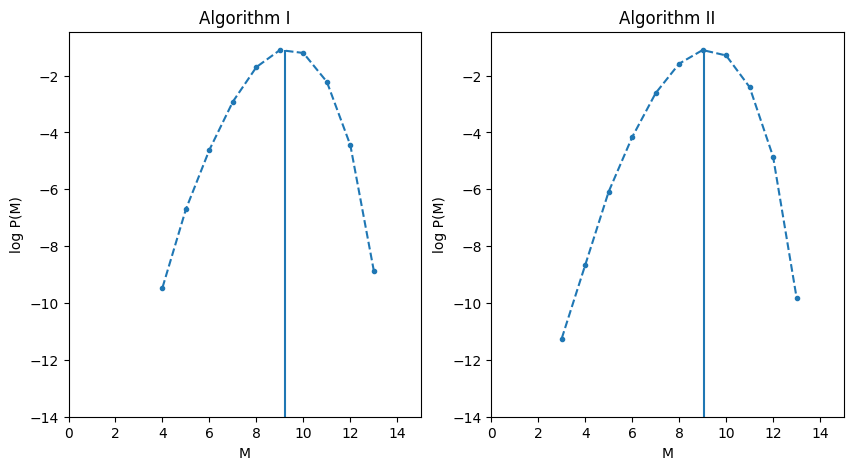

In [5]:
plot_prob(number_of_particles_9_mod1, number_of_particles_9_mod2)

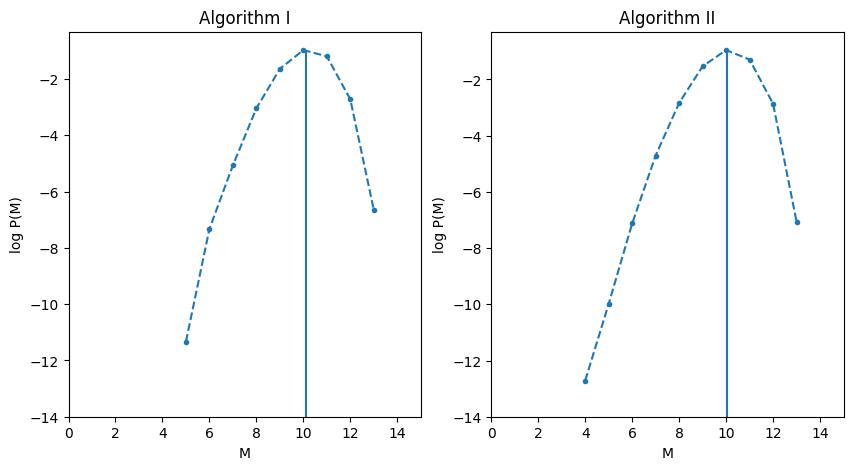

In [6]:
plot_prob(number_of_particles_10_mod1, number_of_particles_10_mod2)

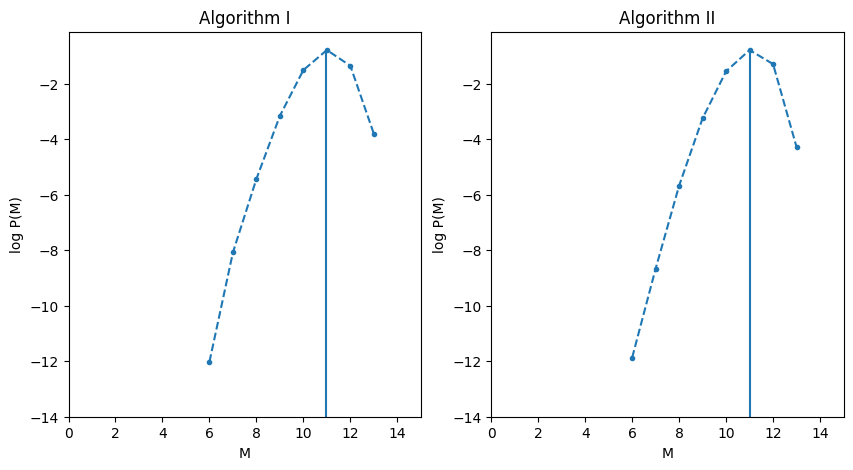

In [7]:
plot_prob(number_of_particles_11_mod1, number_of_particles_11_mod2)

## Single Histogram Extrapolation

* z = 8.4  approx N = 9
* z = 18.7 approx N = 10
* z = 55.0 approx N = 11

In [15]:
z = lambda L, N, sigma: np.exp(-np.log(L-N*sigma) + N * sigma/(L-N*sigma) + np.log(N))

print(z(15, 9, 1))
print(z(15, 10, 1))
print(z(15, 11, 1))

6.722533605507099
14.778112197861303
43.01723768151747


In [9]:
def plot_extrapolation(z1, z2, number1, number2):
    prob1= calc_prob(number1)
    prob2 = calc_prob(number2)
    numbers = np.arange(0, 20)
    average_number = np.average(number1)
    
    extraplolation = (z2/z1)**(numbers - average_number) * prob1
    
    plt.plot(numbers[prob2 != 0], np.log(prob2[prob2 != 0]), ".--", label="data")
    plt.plot(numbers[extraplolation != 0], np.log(extraplolation[extraplolation != 0]), ".--", label="extrapolation")
    
    plt.xlim(0, 15)
    plt.ylim(-14)
    plt.xlabel("M")
    plt.ylabel("log P(M)")
    plt.legend()
    plt.show()
    

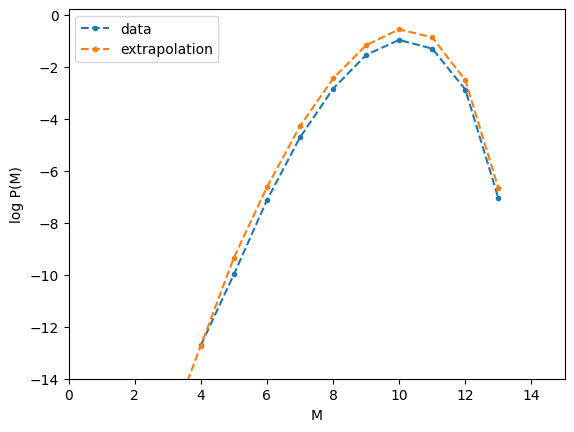

In [10]:
plot_extrapolation(8.4, 18.7, number_of_particles_9_mod2, number_of_particles_10_mod2)

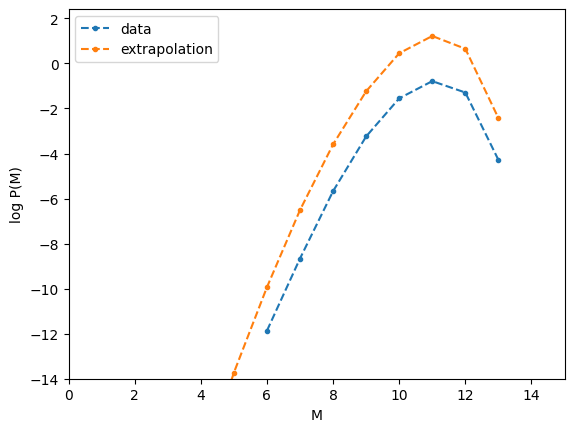

In [11]:
plot_extrapolation(8.4, 55.0, number_of_particles_9_mod2, number_of_particles_11_mod2)